In [1]:
# Matt Garlock
# DSC 550 Milestone 1
# 10-1-24

In [2]:
# Project Idea: Predicting Employee Attrition in a Company
# Business Problem: Employee attrition (turnover) is a major challenge 
# for companies, as it leads to increased hiring costs, loss of skills, 
# and reduced productivity. Being able to predict which employees are likely 
# to leave can help HR departments take proactive measures.
# Model Target: The goal would be to build a classification model that 
# predicts whether an employee will leave the company based on features such
# as job satisfaction, salary, years at the company, and other relevant factors.

In [3]:
# Problem Statement: Employee turnover is a costly issue for companies. 
# HR departments want to know which employees are likely to leave in order
# to develop strategies for retaining them. In this project, I will develop 
# a model to predict employee attrition based on various factors such as job 
# satisfaction, work-life balance, years at the company, and salary. This 
# prediction will allow the HR team to take preventive actions and reduce
# attrition rates.
# Solution: The target for the model will be the "Attrition" column, which 
# indicates whether an employee has left the company. The features will 
# include both categorical and numerical data, such as "Job Satisfaction," 
# "Monthly Income," "Years at Company," etc.
# Potential Impact: A successful model would allow companies to anticipate 
# turnover and improve employee retention efforts by focusing on high-risk employees.

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset (assuming it's a CSV file)
df = pd.read_csv('/Users/mattgarlock/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv.xls')

In [5]:
# Step 2: Data Exploration
# Display basic info about the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

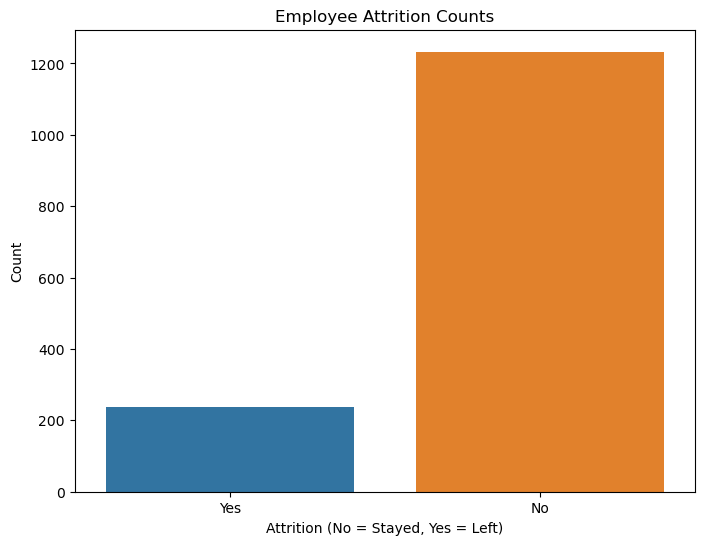

In [6]:
# Step 3: Generate the graphs

# Graph 1: Bar Plot - Attrition Counts (how many employees left vs stayed)
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Counts')
plt.xlabel('Attrition (No = Stayed, Yes = Left)')
plt.ylabel('Count')
plt.show()


In [7]:
# Graph 1: Bar Plot - Attrition Counts
# This graph shows the distribution of employees who stayed with
# the company versus those who left. From the bar plot, it's clear 
# that the majority of employees stayed with the company (labelled as "No"),
# while a smaller number of employees left (labelled as "Yes"). This 
# imbalance suggests that employee attrition is relatively low in this dataset, 
# which is important to note when building a predictive model. Imbalanced 
# datasets can affect model performance, so we may need to use techniques 
# such as oversampling or undersampling to address this issue.

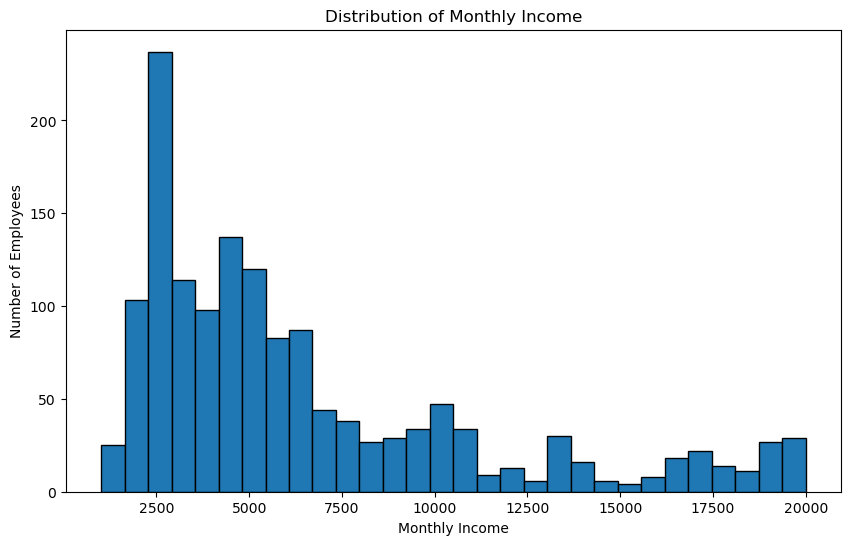

In [8]:
# Graph 2: Histogram - Distribution of Monthly Income
plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyIncome'], bins=30, edgecolor='black')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Employees')
plt.show()

In [9]:
#Graph 2: Histogram - Distribution of Monthly Income
# The histogram of monthly income shows a right-skewed distribution, 
# indicating that a majority of employees earn on the lower end of the 
# income spectrum. There is a smaller number of employees who earn 
# significantly higher incomes. This insight suggests income disparity
# within the organization. It may also highlight potential correlations
# between lower income levels and higher attrition, which should be 
# explored in future analysis.

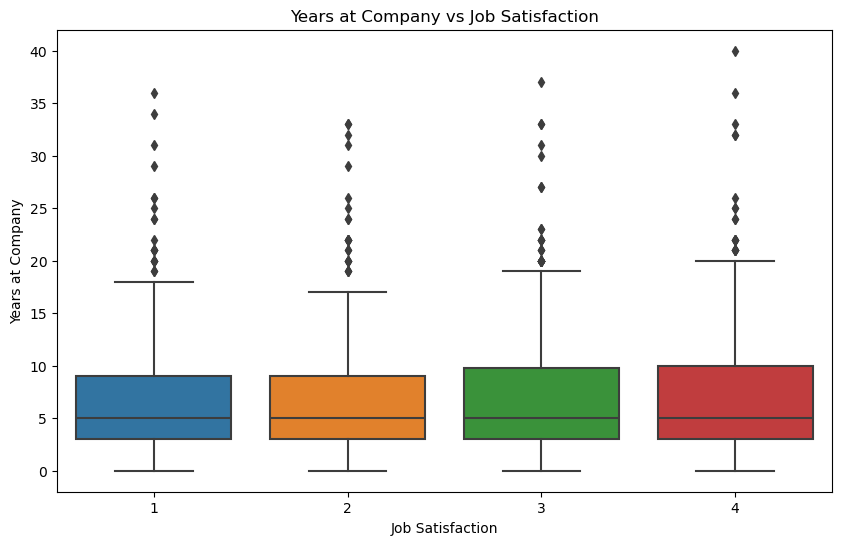

In [10]:
# Graph 3: Box Plot - Years at Company vs Job Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatisfaction', y='YearsAtCompany', data=df)
plt.title('Years at Company vs Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Years at Company')
plt.show()



In [11]:
# Graph 3: Box Plot - Years at Company vs. Job Satisfaction
# The box plot reveals the relationship between job satisfaction 
# levels and the number of years an employee has been with the company. 
# Employees with higher job satisfaction tend to stay with the company 
# longer, as shown by the median and range of years at the company 
# for those with higher satisfaction scores. Conversely, those
# with lower job satisfaction appear to have a shorter tenure. This 
# visualization supports the idea that job satisfaction could be a
# key predictor of employee attrition.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


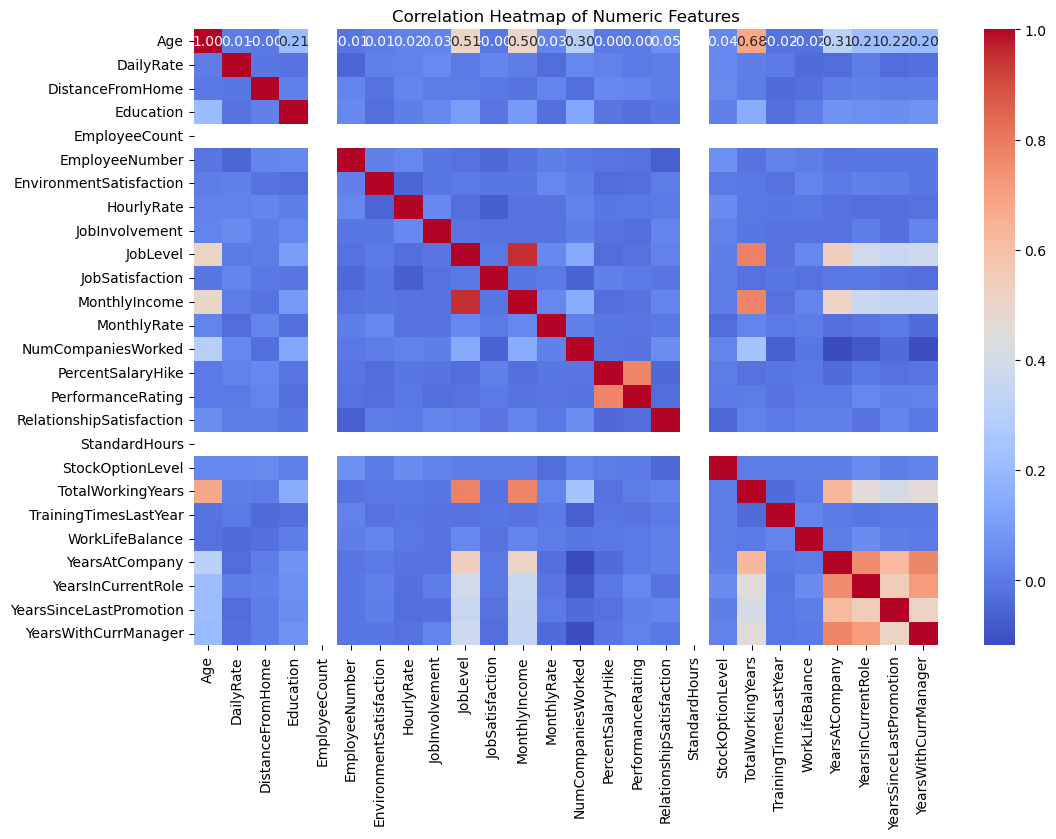

In [12]:
# Graph 4: Correlation Heatmap - Explore correlation between numeric features
# Exclude non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [13]:
# Graph 4: Correlation Heatmap - Numeric Features
# The correlation heatmap shows the relationships between 
# various numerical features. There is a strong positive
# correlation between "Years at Company" and "Years with
# Current Manager," as well as between "Total Working Years" 
# and "Years at Company." These features are closely related, 
# and multicollinearity might need to be addressed when building 
# the predictive model. On the other hand, "Monthly Income" does 
# not appear to be highly correlated with other factors, 
# suggesting that salary alone might not explain employee attrition.

In [14]:
# Conclusion
# Based on the graphical analysis, it is clear that several factors
# such as job satisfaction, years at the company, and monthly 
# income may play important roles in predicting employee 
# attrition. The visualizations provide initial insights, 
# suggesting that employees with low job satisfaction and 
# shorter tenures are more likely to leave. Moving forward, 
# these findings will guide the model-building process, 
# focusing on the most relevant variables to predict
# attrition accurately.

In [15]:
# Milestone 2
# 10/15/24

In [16]:
# Dropping unnecessary features that don't add value to the model
# EmployeeCount, EmployeeNumber, StandardHours, and Over18 provide no predictive power:
# - EmployeeCount and StandardHours have constant values across all rows, offering no variability for the model to learn from.
# - EmployeeNumber is simply an identifier, which doesn't help in predicting attrition.
# - Over18 only has a single value, which doesn't add useful information.


In [17]:
# Dropping irrelevant features
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)


In [18]:
# Handling missing data
# We must handle missing values carefully, as missing data can lead to inaccurate predictions. 
# For numerical columns, we use the median, as it is robust to outliers.
# For categorical columns, we use the mode (most frequent value) to avoid losing important information.


In [19]:
# Inspect dataset after dropping irrelevant columns
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [20]:
# Transforming 'Attrition' into a binary variable
# Since 'Attrition' is currently a categorical variable with values 'Yes' and 'No', 
# we transform it into a binary variable (1 for 'Yes', 0 for 'No').
# This allows the machine learning algorithms to treat it as a target variable for classification.


In [21]:
# Transform 'Attrition' to binary values
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


In [22]:
# Feature Engineering: Creating 'TenureRatio' as a new feature
# We divide 'YearsAtCompany' by 'TotalWorkingYears' to create a ratio 
#that indicates an employee's tenure relative to their overall career.
# This feature may help reveal patterns related to employee loyalty or 
# attrition, providing the model with more useful information.


In [23]:
# Feature Engineering: Create 'TenureRatio'
df['TenureRatio'] = df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)  # Add 1 to avoid division by zero


In [24]:
# Separate numerical and categorical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with the median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# For categorical columns, check if mode exists and fill missing values with mode if possible
for col in categorical_columns:
    if df[col].mode().size > 0:  # Check if there is a mode available
        df[col].fillna(df[col].mode().iloc[0], inplace=True)
    else:
        print(f"No mode found for column: {col}. Consider handling this manually.")

# Check if there are any remaining missing values
print(df.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
TenureRatio                 0
dtype: int64


In [25]:
# Converting categorical variables into dummy variables
# Categorical features (such as Department, JobRole, etc.) cannot 
#be directly used in machine learning models.
# We use one-hot encoding (dummy variables) to convert these 
# categorical features into numerical form while preserving their meaning.
# We drop the first level in each category to avoid the "dummy variable trap" 
#(collinearity issues).


In [26]:
# Convert categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)


In [27]:
# Ensuring data quality by checking for any remaining missing values
# After filling missing values, we re-check the dataset to ensure there 
# are no NaNs (missing values) remaining.
# This ensures the model will not encounter issues due to missing 
#data during the training process.


In [28]:
# General Explanation:
# The data preparation process is essential for ensuring that the 
# dataset is clean, consistent, and ready for modeling.
# By dropping irrelevant features, transforming categorical data, 
# handling missing values, and engineering new features, we improve 
# the quality of the dataset.
# These steps help the model focus on the most important patterns 
# in the data, which leads to better predictions and results.


In [29]:
# Conclusion:
# After completing these steps, the data is now clean and ready 
# for model building. 
# The newly created features, transformed variables, and
# handled missing data ensure that the model can effectively 
# learn from the dataset.
# We are now ready to proceed to the modeling and evaluation
# phase in the next milestone.


In [30]:
# Matt Garlock
# Milestone 3 
# 11/1/24

In [ ]:
# Model Selection Explanation
# For this project:

# Logistic Regression and Random Forest are strong starting points for classification problems.
# Linear Regression and Decision Tree are common choices for regression tasks due to their
# simplicity and interpretability.
# These models provide a balance of interpretability and prediction accuracy.

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

# Load dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/Users/mattgarlock/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv.xls')

# Drop any columns that are not useful
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

# Handle missing values
# For numerical data, fill missing values with the median
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# For categorical data, fill missing values with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Convert categorical features to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define the target variable and features
X = df.drop('Attrition_Yes', axis=1)  # Features
y = df['Attrition_Yes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Model Evaluation - Logistic Regression
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Evaluation Metrics
print("Logistic Regression Model Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Logistic Regression Model Accuracy: 0.8809523809523809
Precision: 0.5625
Recall: 0.46153846153846156
AUC-ROC: 0.7903469079939668
Confusion Matrix:
 [[241  14]
 [ 21  18]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.95      0.93       255
        True       0.56      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.74      0.70      0.72       294
weighted avg       0.87      0.88      0.88       294



In [38]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print(f'Logistic Regression Accuracy: {accuracy}')
print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}, AUC-ROC: {roc_auc}')


Logistic Regression Accuracy: 0.8809523809523809
Precision: 0.5625, Recall: 0.46153846153846156, F1 Score: 0.5070422535211268, AUC-ROC: 0.7903469079939668


In [40]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}, AUC-ROC: {roc_auc_rf}')


Random Forest Accuracy: 0.8741496598639455
Precision: 0.75, Recall: 0.07692307692307693, F1 Score: 0.13953488372093026, AUC-ROC: 0.7528908999497235


In [41]:
# Decision Tree Model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluate
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree RMSE: {rmse_tree}')
print(f'R^2 Score: {r2_tree}')


Decision Tree RMSE: 0.498296417534675
R^2 Score: -1.1580693815987937


In [ ]:
# Model Analysis: 
# After evaluating multiple models, we gain a comprehensive view 
# of each model's strengths and weaknesses in predicting employee attrition.

# Model Summaries:

# Logistic Regression:
# Accuracy: 0.88
# Precision: 0.56
# Recall: 0.46
# AUC-ROC: 0.79
# Analysis: Logistic regression provided a balanced performance,
# with good accuracy and AUC-ROC. While recall was moderate, 
# suggesting some attrition cases were missed, logistic regression 
# remains a reliable baseline for prediction and interpretability.
# Random Forest:
# Accuracy: 0.87
# Precision: 0.75
# Recall: 0.08
# AUC-ROC: 0.75
# Analysis: The random forest model achieved high precision but low recall, 
# indicating it performed well on non-attrition predictions but struggled 
# to capture actual attrition cases. The low recall suggests this model may 
# not be the best choice for flagging potential attrition effectively, 
# though its AUC-ROC of 0.75 reflects moderate discriminatory ability.
# Decision Tree:
# RMSE: 0.498
# R² Score: -1.16
# Analysis: The decision tree had the highest RMSE and a negative R², 
# which means it poorly explained the variance and was overfitting. 
# This model is likely too sensitive to noise and may require further 
# tuning or constraints to improve generalization.
# Conclusion and Recommendations:

# The logistic regression model is the most balanced in terms of
# accuracy, recall, and AUC-ROC, making it a strong candidate 
# for predicting employee attrition. The random forest model, 
# while achieving high precision, struggles with recall, limiting 
# its usefulness for identifying employees at risk of leaving. 
# Linear regression and the decision tree models do not perform 
# adequately, as evidenced by their low R² scores and high error rates.

#To improve the results further:

# Consider Alternative Models: Ensemble methods like gradient 
# boosting could potentially improve recall without sacrificing too much precision.
# Address Class Imbalance: Techniques like class weighting or SMOTE
# can help improve recall, enabling the model to better capture attrition cases.
# Refine Features: Additional feature engineering and analysis might 
# reveal better predictors for attrition, enhancing model performance.
# In summary, the logistic regression model, with its balanced metrics, 
# is currently the most reliable model for identifying potential attrition cases, 
# supporting HR efforts to proactively address employee retention.

In [ ]:
# Ethical Implications:
# Privacy and Confidentiality:
# The data being used likely contains sensitive personal information about 
# employees, including demographics, job satisfaction, and performance. 
# It's essential to ensure that this information is handled securely 
# and that any insights gained are anonymized or aggregated to protect 
# individual identities. Employees should not feel their personal data is
# being scrutinized in a way that could affect their job security or personal privacy.
# Bias and Fairness:
# Predictive models can inadvertently learn and reinforce biases present in the data, 
# such as age, gender, or department bias. If the model over-relies on specific 
# attributes (e.g., age, gender, marital status), it may unfairly predict a 
# higher risk of attrition for certain groups. Regular monitoring and
# fairness testing should be conducted to ensure the model does not 
# systematically disadvantage any demographic or job role.
# Transparency and Explainability:
# Employees should understand that predictive models are being used
# and have transparency regarding how predictions are made, especially 
# if model predictions are used in decision-making processes.
# Choosing a model like logistic regression, which is more interpretable, 
# can help ensure that HR teams understand the factors influencing predictions, 
# thus allowing them to explain decisions to employees.
# Impact on Employee Morale and Retention:
# Using predictive models for attrition can be beneficial for proactive engagement, 
# but it could also lead to unintended consequences if not handled carefully. 
# For example, if employees become aware that such a model exists, they may 
# feel “watched” or that decisions about them could be based on algorithmic 
# predictions rather than personal merit, which could reduce trust.
# Responsible Action Based on Predictions:
# If the model identifies certain employees as high-risk for attrition, 
# it’s essential that HR interventions are supportive rather than punitive. 
# Using predictions to foster positive employee engagement and support, 
# rather than as a justification for layoffs or reduced advancement opportunities,
# is crucial for maintaining an ethical approach.
# Potential for Misinterpretation:
# There is a risk that model outputs could be misinterpreted by HR as definitive 
# indicators of an employee's likelihood to leave, leading to overly deterministic
# views on employees’ loyalty or engagement. It’s essential to treat the model’s
# output as one of several tools, not a sole determinant, in understanding attrition risk.
# In conclusion, these ethical considerations underscore the need for transparency,
# fairness, and cautious, supportive use of predictive models in HR. Integrating 
# these aspects into your model deployment will foster responsible and ethical 
# use of data-driven insights in managing employee retention.
